In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [18]:
# Étape 1 : Chargement des bibliothèques
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib  # pour sauvegarder le modèle


In [19]:
# Étape 2 : Chargement des données
df = pd.read_csv('C:\\Users\\NOUR1\\house-prices-mlops\\data\\train.csv')

# Aperçu des données
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
# Étape 3 : Sélection des colonnes numériques
df_num = df.select_dtypes(include=['int64', 'float64']).dropna()

print(f"Nombre de colonnes numériques retenues : {df_num.shape[1]}")
df_num.head()


Nombre de colonnes numériques retenues : 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
print(f"Lignes avant dropna : {df.select_dtypes(include=['int64', 'float64']).shape[0]}")
print(f"Lignes après dropna  : {df_num.shape[0]}")


Lignes avant dropna : 1460
Lignes après dropna  : 1121


In [22]:
df_num.head() #DataFrame nettoyé et pas de valeur manquantes 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [23]:
# Étape 4 : Séparation X / y
X = df_num.drop('SalePrice', axis=1)
y = df_num['SalePrice']


In [24]:
# Création de bins pour la stratification
y_bins = pd.cut(y, bins=10, labels=False)


In [25]:
# Étape 5 : Split avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y_bins
)

print("Taille du train :", X_train.shape)
print("Taille du test :", X_test.shape)


Taille du train : (896, 37)
Taille du test : (225, 37)


In [26]:
print("Proportion de train / test :")
print(f"Train : {len(X_train) / len(X):.2f}")  # doit être ~0.8
print(f"Test  : {len(X_test) / len(X):.2f}")   # doit être ~0.2


Proportion de train / test :
Train : 0.80
Test  : 0.20


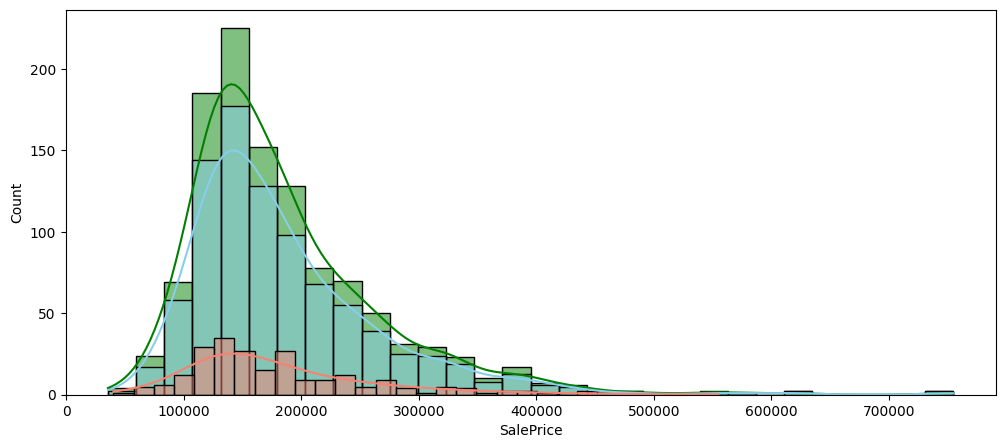

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une figure avec 2 graphiques côte à côte
plt.figure(figsize=(12, 5))

sns.histplot(y, bins=30, kde=True, color="green")
# Histogramme / densité pour y_train
# plt.subplot(1, 2, 1)
sns.histplot(y_train, bins=30, kde=True, color="skyblue")
# plt.title("Distribution de SalePrice - Entraînement")
# plt.xlabel("SalePrice")
# plt.ylabel("Fréquence")

# Histogramme / densité pour y_test
# plt.subplot(1, 2, 2)
sns.histplot(y_test, bins=30, kde=True, color="salmon")
# plt.title("Distribution de SalePrice - Test")
# plt.xlabel("SalePrice")
# plt.ylabel("Fréquence")

# plt.tight_layout()
plt.show()


In [28]:
# Étape 6 : Entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
# Étape 7 : Évaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calcul des métriques
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== Évaluation du modèle ===")
print(f"RMSE (train): {train_rmse:.2f}")
print(f"RMSE (test): {test_rmse:.2f}")
print(f"R² (train): {train_r2:.3f}")
print(f"R² (test): {test_r2:.3f}")


=== Évaluation du modèle ===
RMSE (train): 37518.06
RMSE (test): 31279.82
R² (train): 0.797
R² (test): 0.852


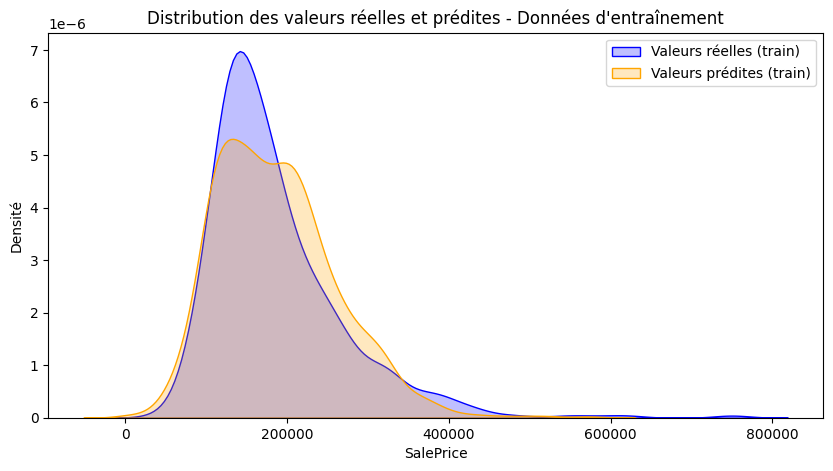

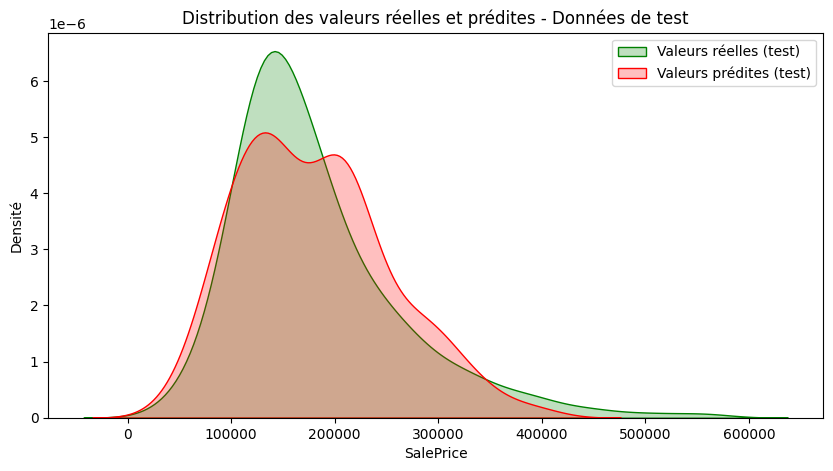

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Densité pour le train
plt.figure(figsize=(10, 5))
sns.kdeplot(y_train, label="Valeurs réelles (train)", fill=True, color="blue")
sns.kdeplot(y_train_pred, label="Valeurs prédites (train)", fill=True, color="orange")
plt.title("Distribution des valeurs réelles et prédites - Données d'entraînement")
plt.xlabel("SalePrice")
plt.ylabel("Densité")
plt.legend()
plt.show()

# Densité pour le test
plt.figure(figsize=(10, 5))
sns.kdeplot(y_test, label="Valeurs réelles (test)", fill=True, color="green")
sns.kdeplot(y_test_pred, label="Valeurs prédites (test)", fill=True, color="red")
plt.title("Distribution des valeurs réelles et prédites - Données de test")
plt.xlabel("SalePrice")
plt.ylabel("Densité")
plt.legend()
plt.show()



In [31]:
# Étape 8 : Sauvegarde du modèle
joblib.dump(model, 'model.pkl')
print("Modèle sauvegardé sous le nom : model.pkl")


Modèle sauvegardé sous le nom : model.pkl
